Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7511 - accuracy: 0.7927 - val_loss: 0.3333 - val_accuracy: 0.9120
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4044 - accuracy: 0.8842 - val_loss: 0.2634 - val_accuracy: 0.9290
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3404 - accuracy: 0.9023 - val_loss: 0.2306 - val_accuracy: 0.9375
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.9137 - val_loss: 0.2068 - val_accuracy: 0.9450
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2762 - accuracy: 0.9206 - val_loss: 0.1893 - val_accuracy: 0.9488
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9250 - val_loss: 0.1756 - val_accuracy: 0.9545
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2361 - accuracy: 0.9329 - val_loss: 0.1643 - val_accuracy

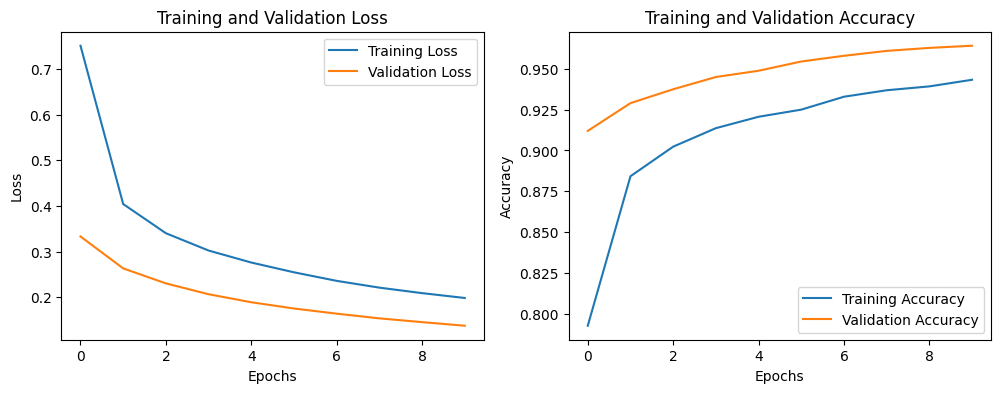

In [ ]:
# Import necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the network architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 784-vector
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model with SGD optimizer
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()
